In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import json
import pandas as pd

import botfuel_qna as bq
from botfuel_qna import util

In [3]:
bq.load_secrets_as_env_variables(verbose=True)
proxies = bq.get_proxies(verbose=True)

Loading secrets from my_secret.txt as env variables
APP_ID: 4******f
APP_KEY: d******************************c
proxies: {}


## Build dataset

In [4]:
path = os.path.join('data', 'dataset-qna-ic.xlsx')
df_qna = pd.read_excel(path, sheet_name='QnA')
df_corpus = pd.read_excel(path, sheet_name='corpus', header=None)

df_qna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
Answer      19 non-null object
Question    96 non-null object
dtypes: object(2)
memory usage: 1.6+ KB


In [5]:
df_corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
0    7 non-null object
1    7 non-null object
2    4 non-null object
3    1 non-null object
dtypes: object(4)
memory usage: 304.0+ bytes


In [6]:
df_qna['Answer'] = df_qna['Answer'].apply(bq.remove_html)
    
corpus = []
for group in df_corpus.values:
    dic = {}
    dic['name'] = group[0]
    dic['words'] = [e for e in group[1:] if pd.notnull(e)]
    corpus.append(dic)

df = df_qna.fillna(method='ffill')
g = df.groupby('Answer')
qnas = []
for k in g.groups.keys():
    dic = {}
    dic['name'] = k
    dfk = g.get_group(k)
    dic['questions'] = list(dfk['Question'])
    qnas.append(dic)

data = {'corpus': corpus, 'qnas': qnas}

path = os.path.join('data', 'dataset.json')
with open(path, 'w') as f:
    f.write(json.dumps(data))

# corpus
# qnas
# print(json.dumps(data, indent=2))

## Data overview

Nb groups in corpus: **7**

Nb words
client              3
contact             2
information         2
search              2
existing            1
position            1
structure           1

Nb answers-questions in qnas: **19**-**96**

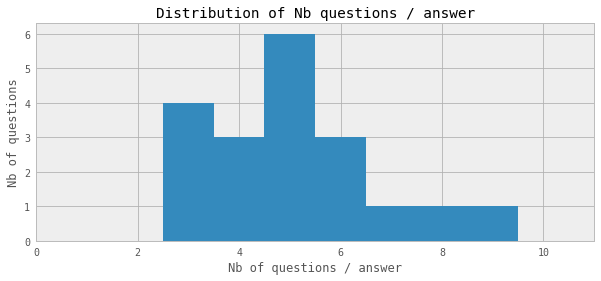

In [20]:
dd = bq.data_overview(data)

## Test spellcheck

In [21]:
bq.spellcheck('The sentence you watn to chekc')

{'correctSentence': 'The sentence you want to check',
 'correctWords': ['want', 'check'],
 'originalSentence': 'The sentence you watn to chekc',
 'originalWords': ['watn', 'chekc'],
 'possibleCorrections': [{'corrections': ['want', 'wasn'],
   'originalWord': 'watn'},
  {'corrections': ['check'], 'originalWord': 'chekc'}],
 'sentenceTemplate': 'The sentence you {0} to {1}'}

## Upload dataset

In [43]:
# path = os.path.join('data', 'dataset.json')
# with open(path, 'r') as f:
#     dataset = json.loads(f.read())

In [10]:
r = bq.upload_dataset(data, proxies)
r

<Response [200]>

In [11]:
r.content

b''